# Image Augmentation

**What is Image Augmentation ?** <br>
For training deep neural networks we need a lot of images. Image Augmentation is the process where we can manipulate or alter our training images, to create new images. Thus we can generate new images which can provide a larger dataset to train our models.


**imgaug** is a powerful library to perform image augmentation in machine learning. <br> It converts a set of input images into a new, much larger set of slightly altered images. <br> It supports a wide range of image augmentation techniques and can augment keypoints, bounding boxes and heatmaps on images.

### 1. Installation

You can install the latest version using

In [ ]:
pip install imgaug --quiet

### 2. What are Augmenters

**Augmenters** are functions which can perform augmentations in an image.
The **imgaug** library contains a vast range of augmenters. Here we will focus on the more commonly used 
image augmenters in object localization and detection.


In [2]:
import imgaug as ia                                        # Import imgaug library
from imgaug import augmenters as iaa                       # Import augmenters

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Connect to Google Drive to load images (optional setup)
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:
# Loading images
import glob
fps = glob.glob("/gdrive/My Drive/ACV/Image Augmentation/*.jpg")
images = [plt.imread(fp) for fp in fps]

In [6]:
fps

['/gdrive/My Drive/Great Learning/ACV - I/Notebooks/Image Augmentation/cycle.jpg',
 '/gdrive/My Drive/Great Learning/ACV - I/Notebooks/Image Augmentation/dog-maltese.jpg',
 '/gdrive/My Drive/Great Learning/ACV - I/Notebooks/Image Augmentation/snowman.jpg',
 '/gdrive/My Drive/Great Learning/ACV - I/Notebooks/Image Augmentation/football.jpg',
 '/gdrive/My Drive/Great Learning/ACV - I/Notebooks/Image Augmentation/taj mahal.jpg']

In [7]:
# Display the original images
def plotimages(images, columns=5):
    fig=plt.figure(figsize=(15, 15))
    #columns = 5
    rows = 1
    for i in range(1, columns*rows +1):
        ax = fig.add_subplot(rows, columns, i)
        ax.imshow(images[i-1])
    fig.tight_layout()

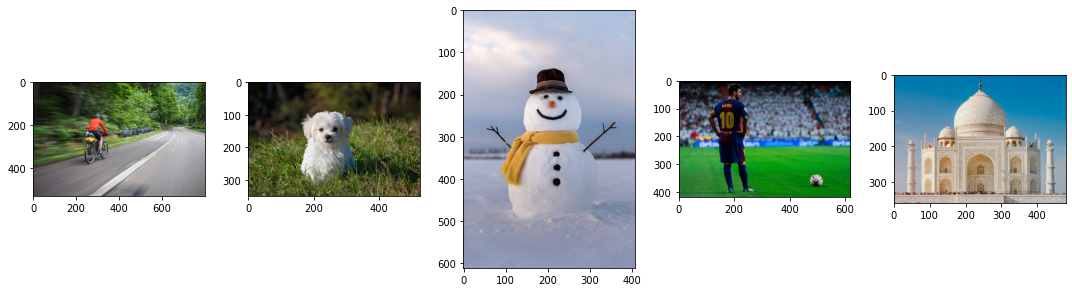

In [8]:
plotimages(images)

### 2.1 Fliplr

Randomly flip 100% of the images

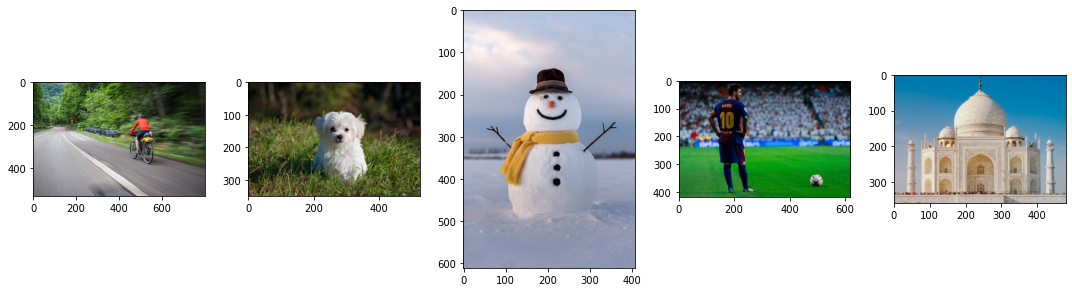

In [10]:
seq = iaa.Fliplr(0.5) # horizontal flip 100% of the images
images_aug = seq.augment_images(images)
plotimages(images_aug)

### 2.2 Flipud

Randomly flip 50% images vertically

In [ ]:
seq = iaa.Flipud(0.5) # vertically flip 50% of the images
images_aug = seq.augment_images(images)
plotimages(images_aug)

### 2.3 Invert

Invert the pixel value in a channel.
For e.g pixel value is x, after invert it will be 255-x  <br>
This may result in change in color.

In [ ]:
# Invert each image's channel with 25% probability.
seq = iaa.Invert(0.25, per_channel=True) # invert color channels
images_aug = seq.augment_images(images)
plotimages(images_aug)

### 2.4 Add

Add a value to all the pixels in an image. This results in change in brightness.

In [ ]:
# For every image per channel(red, white, green) sample 50% and add their pixel value with a random value between -40 to 40
seq = iaa.Add((-100, 100), per_channel=0.5)
images_aug = seq.augment_images(images)
plotimages(images_aug)

### 2.5 Multiply

Multiply all the pixel values with a specific value, thereby making the image brighter or darker.

In [ ]:
# For every image per channel(red, white, green) sample 50% and multiply their pixel value with a random value between 0.8 to 1.6
seq = iaa.Multiply((0.8, 1.6), per_channel=0.5)
images_aug = seq.augment_images(images)
plotimages(images_aug)

### 2.6 Gaussian Blur

This is used to blur images using a gaussian kernel.

In [ ]:
seq = iaa.GaussianBlur(sigma=(0, 3.0))        # blur images with a gaussian kernel with sigma of random value of 0 to 3.0
images_aug = seq.augment_images(images)
plotimages(images_aug)

### 2.9 Sharpen

Sharpen an image using an alpha value between 0.0 and 1.0 and lightness range.

In [ ]:
seq = iaa.Sharpen(alpha=(0.0, 1.0), lightness=(0.75, 2.0))
images_aug = seq.augment_images(images)
plotimages(images_aug)

### 3. Operations on bounding boxes

 All the above operations do not affect bounding boxes. Lets see some operations that affect them.

Translate <br>
Scale   <br>
Rotate  <br>
Shear   <br>
Fliplr and Flipud  <br>


In [ ]:
# Image
image = images[3]
plt.imshow(image)
plt.show()

In [ ]:
# Defining the bounding boxes
bbs = ia.BoundingBoxesOnImage([  
    ia.BoundingBox(x1=102, y1=11, x2=294, y2=410),      # these are the xmin, ymin, xmax and ymax coordinate values
    ia.BoundingBox(x1=470, y1=330, x2=525, y2=390),
], shape=image.shape)

In [ ]:
# Draw bounding box over image
plt.figure(figsize=(10,10))
image_before = bbs.draw_on_image(image, size=5)
plt.imshow(image_before)
plt.show()

### 3.1 Affine

Affine transformation includes:

- translate_percent
- translate_px
- scale
- rotate
- shear

### 3.1.1 Translate with pixel

In [ ]:
# Translate the picture with 40px and 60px on x and y axis respectively
seq = iaa.Affine(translate_px={"x": 40, "y": 60}) # translate by 40/60px on x/y axis
seq_det = seq.to_deterministic()

In [ ]:
# Applying augmentation on the bounding boxes and image
image_aug = seq_det.augment_images([image])[0]
bbs_aug = seq_det.augment_bounding_boxes([bbs])[0]

In [ ]:
# print coordinates before/after augmentation (see below)
# use .x1_int, .y_int, ... to get integer coordinates

for i in range(len(bbs.bounding_boxes)):
    before = bbs.bounding_boxes[i]
    after = bbs_aug.bounding_boxes[i]
    print("BB %d: (%.4f, %.4f, %.4f, %.4f) -> (%.4f, %.4f, %.4f, %.4f)" % (
        i,
        before.x1, before.y1, before.x2, before.y2,
        after.x1, after.y1, after.x2, after.y2)
    )

In [ ]:
# image with BBs before/after augmentation (shown below)
image_before = bbs.draw_on_image(image, size=10)
image_after = bbs_aug.draw_on_image(image_aug, size=10, color=[255, 0, 0])


def plotbeforeafter(before, after):
    f = plt.figure(figsize=(15,15))
    f.add_subplot(1,2, 1)
    plt.imshow(image_before)
    plt.title('Before')
    f.add_subplot(1,2, 2)
    plt.imshow(image_after)
    plt.title('After')

In [ ]:
plotbeforeafter(image_before, image_after)

### 3.1.2 Translate with percent

In [ ]:
# Translate the image on x and y axis by +20 to -20 percent respectively
seq = iaa.Affine(translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)})
seq_det = seq.to_deterministic()

In [ ]:
# Applying augmentation on the bounding boxes and image
image_aug = seq_det.augment_images([image])[0]
bbs_aug = seq_det.augment_bounding_boxes([bbs])[0]

In [ ]:
# image with BBs before/after augmentation (shown below)
image_before = bbs.draw_on_image(image, size=10)
image_after = bbs_aug.draw_on_image(image_aug, size=10, color=[255, 0, 0])
plotbeforeafter(image_before, image_after)

### 3.1.3 Scale

In [ ]:
# Scale the image with 50% to 70% of original size
seq = iaa.Affine(scale=(0.5, 1.7))    # and scale to 50-70%
seq_det = seq.to_deterministic()

#Augment image and bbox
image_aug = seq_det.augment_images([image])[0]
bbs_aug = seq_det.augment_bounding_boxes([bbs])[0]

# image with BBs before/after augmentation (shown below)
image_before = bbs.draw_on_image(image, size=10)
image_after = bbs_aug.draw_on_image(image_aug, size=10, color=[0, 0, 255])

#Plot
plotbeforeafter(image_before, image_after)

### 3.1.4 Rotate

In [ ]:
# Rotate image by -60 to 60 degrees
seq = iaa.Affine(rotate=(-60, 60)) 

In [ ]:
seq_det = seq.to_deterministic()
image_aug = seq_det.augment_images([image])[0]
bbs_aug = seq_det.augment_bounding_boxes([bbs])[0]

# image with BBs before/after augmentation (shown below)
image_before = bbs.draw_on_image(image, size=10)
image_after = bbs_aug.draw_on_image(image_aug, size=10, color=[0, 0, 255])

plotbeforeafter(image_before, image_after)

### 3.1.5 Shear

In [ ]:
# shear image by -16 to +16 degrees
seq = iaa.Affine(shear=(-16, 16)) 
seq_det = seq.to_deterministic()

image_aug = seq_det.augment_images([image])[0]
bbs_aug = seq_det.augment_bounding_boxes([bbs])[0]

# image with BBs before/after augmentation (shown below)
image_before = bbs.draw_on_image(image, size=10)
image_after = bbs_aug.draw_on_image(image_aug, size=10, color=[0, 0, 255])

plotbeforeafter(image_before, image_after)

### 3.2 Flipud

Randomly flip 50% images vertically

In [ ]:
seq = iaa.Flipud(1) # vertically flip 50% of the images
seq_det = seq.to_deterministic() 

image_aug = seq_det.augment_images([image])[0]
bbs_aug = seq_det.augment_bounding_boxes([bbs])[0]

#image with BBs before/after augmentation (shown below)
image_before = bbs.draw_on_image(image, size=10)
image_after = bbs_aug.draw_on_image(image_aug, size=10, color=[0, 0, 255])

plotbeforeafter(image_before, image_after)

### 4. Multiple augmentation


### 4.1 Sequential

This lists augmenters that may be applied on all the images in a sequence order.

In [ ]:
#Define sequence of augmentation
seq = iaa.Sequential([
    iaa.Multiply((1.2, 1.5)),
    iaa.Affine(
        translate_px={"x": 40, "y": 60},
        scale=(0.5, 0.7),
        rotate=(-30,30)
    ) # translate by 40/60px on x/y axis, scale to 50-70%, and rotate with -30 to 30 degree affects BBs,
])

In [ ]:
#Different augmentations get applied to different batches
seq_det = seq.to_deterministic() 

#Augment images and boundary boxes
image_aug = seq_det.augment_images([image])[0]
bbs_aug = seq_det.augment_bounding_boxes([bbs])[0]

# image with BBs before/after augmentation (shown below)
image_before = bbs.draw_on_image(image, size=10)
image_after = bbs_aug.draw_on_image(image_aug, size=10, color=[0, 0, 255])

plotbeforeafter(image_before, image_after)

### 4.2 Some Of

Apply only some of the augmenters from the list of augmenters

In [ ]:
# Apply any 2 of the 4 augmenters
aug = iaa.SomeOf(2, [
    iaa.Affine(rotate=45),
    iaa.AdditiveGaussianNoise(scale=0.2*255),
    iaa.Add(50, per_channel=True),
    iaa.Sharpen(alpha=0.5),
    iaa.Flipud(0.5),
    iaa.Fliplr(0.5)
])

aug_det = aug.to_deterministic() 

image_aug = aug_det.augment_images([image])[0]
bbs_aug = aug_det.augment_bounding_boxes([bbs])[0]

# image with BBs before/after augmentation (shown below)
image_before = bbs.draw_on_image(image, size=10)
image_after = bbs_aug.draw_on_image(image_aug, size=10, color=[0, 0, 255])

plotbeforeafter(image_before, image_after)

### 4.3 One Of

Apply any one augmenter from the list of augmenters.

In [ ]:
# Apply any 1 of the 4 augmenters
aug = iaa.OneOf([
    iaa.Affine(rotate=45),
    iaa.AdditiveGaussianNoise(scale=0.2*255),
    iaa.Add(50, per_channel=True),
    iaa.Sharpen(alpha=0.5)
])

aug_det = aug.to_deterministic() 

image_aug = aug_det.augment_images([image])[0]
bbs_aug = aug_det.augment_bounding_boxes([bbs])[0]

# image with BBs before/after augmentation (shown below)
image_before = bbs.draw_on_image(image, size=10)
image_after = bbs_aug.draw_on_image(image_aug, size=10, color=[0, 0, 255])

plotbeforeafter(image_before, image_after)

### 4.4 Sometimes

Apply only p percent of all images with one or more augmenters

In [ ]:
aug = iaa.Sometimes(
    0.5,
    [iaa.Affine(rotate=45),
    iaa.AdditiveGaussianNoise(scale=0.2*255),
    iaa.Add(50, per_channel=True),
    iaa.Sharpen(alpha=0.5)]
)

aug_det = aug.to_deterministic() 

image_aug = aug_det.augment_images([image])[0]
bbs_aug = aug_det.augment_bounding_boxes([bbs])[0]

# image with BBs before/after augmentation (shown below)
image_before = bbs.draw_on_image(image, size=10)
image_after = bbs_aug.draw_on_image(image_aug, size=10, color=[0, 0, 255])

plotbeforeafter(image_before, image_after)